In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2246,spam,Hi ya babe x u 4goten bout me?' scammers getti...,NaN,NaN,NaN
5034,ham,How many times i told in the stage all use to ...,NaN,NaN,NaN
2304,ham,Friendship poem: Dear O Dear U R Not Near But ...,NaN,NaN,NaN
4213,ham,Ard 530 like dat lor. We juz meet in mrt stati...,NaN,NaN,NaN
1573,spam,SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
print(encoder.classes_)

['ham' 'spam']


In [12]:
df.duplicated().sum()

np.int64(403)

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5169, 2)

In [16]:
#eda data analysis

In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

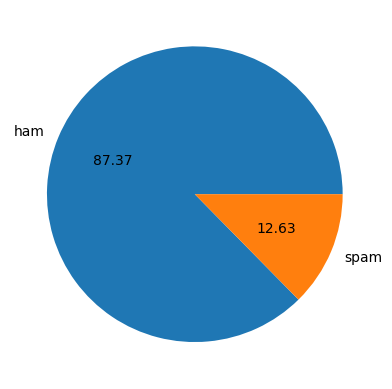

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters']=df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#number of words 
import nltk

nltk.download('punkt_tab')

df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [24]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
print(df[['num_characters', 'num_words', 'num_sentences']].describe())

       num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000


In [26]:
# data preprocessing
# lower case
# tokenization
# removing special characters
# removing stop words and punctuation
# stemming

In [27]:
import nltk
import string
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return" ".join(y)

ps=PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
df['text'].iloc[1000]

"Hasn't that been the pattern recently crap weekends?"

In [29]:
transform_text('Is your name Sahil?')

'name sahil'

In [30]:
df['transformed_text']=df['text'].apply(transform_text)

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [33]:
Message_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

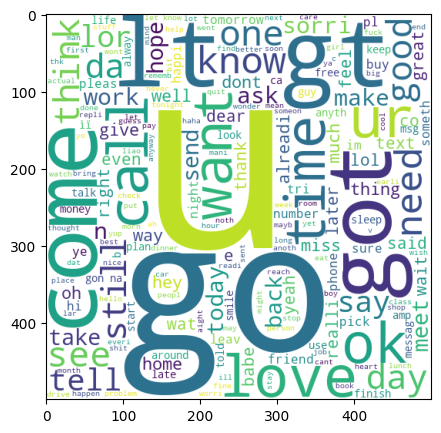

In [34]:
plt.figure(figsize=(5,5))
plt.imshow(Message_wc)

In [35]:
Message_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

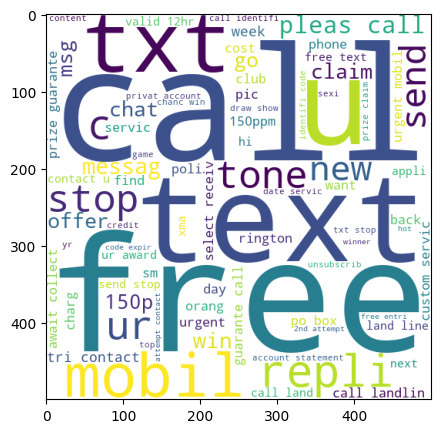

In [36]:
plt.figure(figsize=(5,5))
plt.imshow(Message_wc)

In [37]:
# text vectorization
# using bag of words

In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [39]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [40]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [41]:
#  appending the num_character column to X
X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [42]:
X.shape

(5169, 3001)

In [43]:
y=df['target'].values

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [46]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [47]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [48]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("GaussianNB:")
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

GaussianNB:
0.8936170212765957
[[808  88]
 [ 22 116]]
0.5686274509803921


In [49]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("MultinomialNB:")
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

MultinomialNB:
0.9400386847195358
[[896   0]
 [ 62  76]]
1.0


In [50]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("BernoulliNB:")
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

BernoulliNB:
0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [51]:
#tfidf mnb choose
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [52]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [53]:
clfs={
    'SVC' :svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb,
}

In [54]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred= clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [55]:
train_classifier(svc,X_train,y_train,X_test,y_test)

c:\Users\ASUS\Desktop\spamfilter\tf-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.8665377176015474, 0.0)

In [56]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

# Create performance DataFrame
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

# Show the final DataFrame
print("\nPerformance Summary:")
print(performance_df)

c:\Users\ASUS\Desktop\spamfilter\tf-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For SVC
Accuracy - 0.8665377176015474
Precision - 0.0
For KN
Accuracy - 0.9332688588007737
Precision - 0.822429906542056
For NB
Accuracy - 0.9400386847195358
Precision - 1.0
For DT
Accuracy - 0.9477756286266924
Precision - 0.8888888888888888
For LR
Accuracy - 0.9593810444874274
Precision - 0.9528301886792453
For RF
Accuracy - 0.9729206963249516
Precision - 0.9824561403508771
For AdaBoost
Accuracy - 0.9448742746615088
Precision - 0.8932038834951457
For BgC
Accuracy - 0.960348162475822
Precision - 0.8646616541353384
For ETC
Accuracy - 0.9806576402321083
Precision - 0.9836065573770492
For GBDT
Accuracy - 0.9506769825918762
Precision - 0.9306930693069307
For xgb
Accuracy - 0.971953578336557
Precision - 0.943089430894309

Performance Summary:
   Algorithm  Accuracy  Precision
0        SVC  0.866538   0.000000
1         KN  0.933269   0.822430
2         NB  0.940039   1.000000
3         DT  0.947776   0.888889
4         LR  0.959381   0.952830
5         RF  0.972921   0.982456
6   AdaBoost  

In [57]:
import seaborn as sns

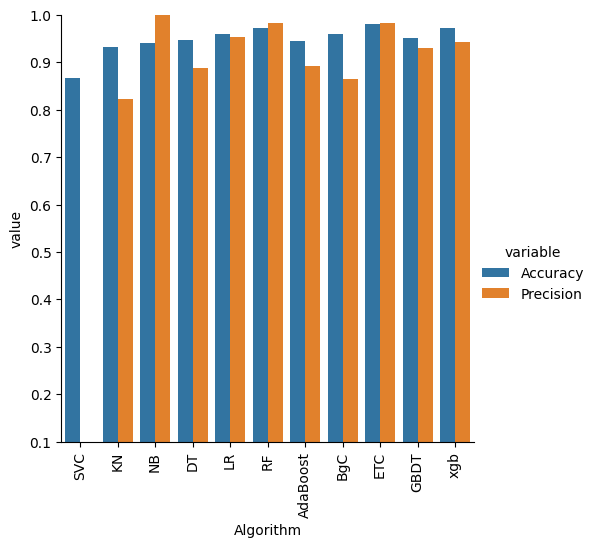

In [58]:
# Reshape the performance_df for plotting
performance_melted = pd.melt(performance_df, id_vars='Algorithm',
                             value_vars=['Accuracy', 'Precision'],
                             var_name='variable', value_name='value')

# Plot it
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_melted, kind='bar', height=5)
plt.ylim(0.1, 1.0)  # You had it reversed before (0.5, 0.1), which would hide the bars
plt.xticks(rotation='vertical')
plt.show()


In [59]:
# voting classfier 
svc=SVC(kernel='sigmoid',gamma=1.0, probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [61]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))])

In [62]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9390715667311412
Precision 1.0


In [63]:
# apply stacking 
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [64]:
from sklearn.ensemble import StackingClassifier

In [65]:
clf=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [66]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [67]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))